In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')

In [3]:
df.head()

ID                                               Name  \
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country             Launched    Deadline  \
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31   
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    Goal  Pledged  Backers       State  
0   1000      625       30      Failed  
1  80000       22        3      Failed  
2     20       35        3  Successful  
3     99      145       25  Successful  
4   1900      387       10      Failed

In [5]:
df.State.value_counts() / len(df)

State
Failed        0.527169
Successful    0.357076
Canceled      0.103377
Live          0.007464
Suspended     0.004914
Name: count, dtype: float64

In [6]:
df.Country.value_counts()

Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [8]:
df["Deadline"] = pd.to_datetime(df["Deadline"])
df["Launched"] = pd.to_datetime(df["Launched"])

In [9]:
df["Duration"] = df["Deadline"] - df["Launched"]

In [10]:
df.head()

ID                                               Name  \
0       1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1        709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2       1703704063                                drawing for dollars   
3           727286                       Offline Wikipedia iPhone app   
4       1622952265                                         Pantshirts   
...            ...                                                ...   
374848  1486845240                  Americas Got Talent - Serious MAK   
374849   974738310  EVO Planner: The World's First Personalized Fl...   
374850  2106246194    Help save La Gattara, Arizona's first Cat Cafe!   
374851  1830173355                                Digital Dagger Coin   
374852  1339173863                              Spirits of the Forest   

            Category     Subcategory        Country            Launched  \
0            Fashion         Fashion  United States 2009-04-21 21:02:48   
1       Film & Video          Shorts  United States 2009-04-23 00:07:53   
2                Art    Illustration  United States 2009-04-24 21:52:03   
3         Technology        Software  United States 2009-04-25 17:36:21   
4            Fashion         Fashion  United States 2009-04-27 14:10:39   
...              ...             ...            ...                 ...   
374848         Music         Hip-Hop  United States 2018-01-02 14:13:09   
374849        Design  Product Design  United States 2018-01-02 14:15:38   
374850          Food            Food  United States 2018-01-02 14:17:46   
374851           Art             Art  United States 2018-01-02 14:38:17   
374852         Games  Tabletop Games          Spain 2018-01-02 15:02:31   

         Deadline   Goal  Pledged  Backers       State         Duration  
0      2009-05-31   1000      625       30      Failed 39 days 02:57:12  
1      2009-07-20  80000       22        3      Failed 87 days 23:52:07  
2      2009-05-03     20       35        3  Successful  8 days 02:07:57  
3      2009-07-14     99      145       25  Successful 79 days 06:23:39  
4      2009-05-26   1900      387       10      Failed 28 days 09:49:21  
...           ...    ...      ...      ...         ...              ...  
374848 2018-01-16    500        0        0        Live 13 days 09:46:51  
374849 2018-02-09  15000      269        8        Live 37 days 09:44:22  
374850 2018-01-16  10000      165        3        Live 13 days 09:42:14  
374851 2018-02-01    650        7        1        Live 29 days 09:21:43  
374852 2018-01-26  24274     4483       82        Live 23 days 08:57:29  

[374853 rows x 12 columns]

In [11]:
kde = df.query("State == 'Failed' or State == 'Successful'")[["State", "Duration"]]
kde["Duration"] = kde["Duration"].dt.days

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will 

([], [])

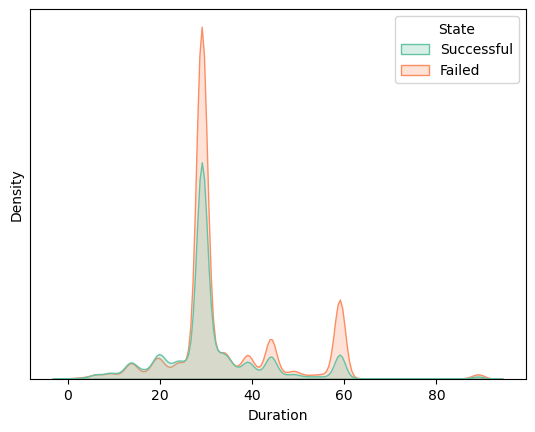

In [12]:
ax = sns.kdeplot(data=kde,
            x="Duration",
            hue="State",
            hue_order=['Successful', 'Failed'],
            palette="Set2",
            fill=True,
            log_scale=[False, False],
            )
plt.yticks([])

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/5l/jn0nhx190jb6f5j__ff3z1zw0000gn/T/ipykernel_5790/3902450029.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[df["State"] == 'Failed']['Duration'].dt.days, palette="Set2", fill=True)
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

<Axes: xlabel='Duration', ylabel='Density'>

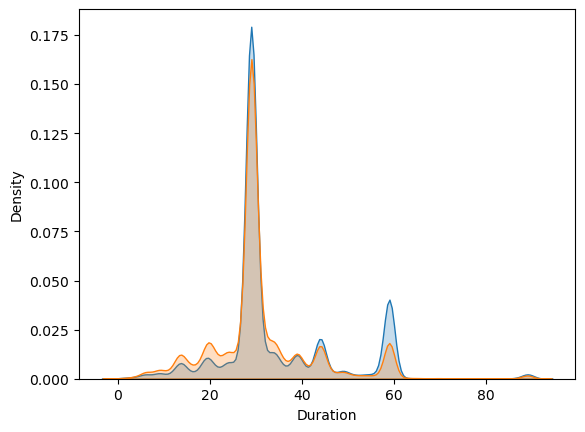

In [13]:
sns.kdeplot(x=df[df["State"] == 'Failed']['Duration'].dt.days, palette="Set2", fill=True)
sns.kdeplot(x=df[df["State"] == 'Successful']['Duration'].dt.days, palette="Set2", fill=True)

In [14]:
durations = df

<Axes: >

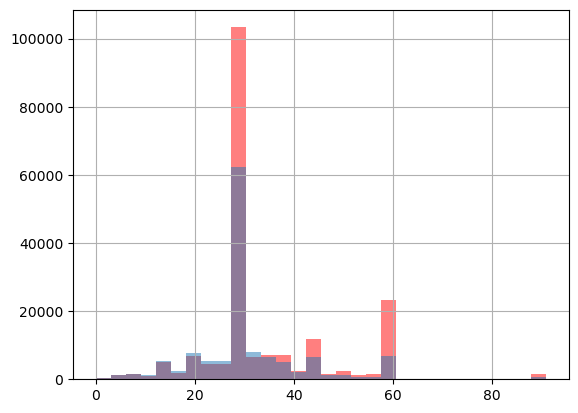

In [15]:
df[df["State"] == 'Failed']["Duration"].dt.days.hist(bins=30, color="red", alpha=0.5)
df[df["State"] == 'Successful']["Duration"].dt.days.hist(bins=30, alpha=0.5)
#plt.yscale("log")


In [16]:
bicategoriacal = df.query("State == 'Failed' or State == 'Successful'")

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

<Axes: xlabel='Duration', ylabel='Goal'>

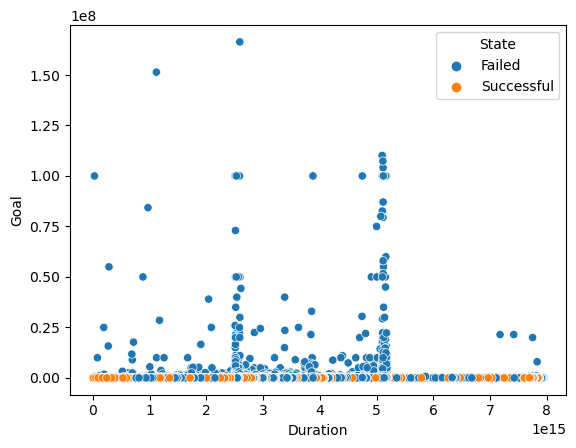

In [17]:
sns.scatterplot(data=bicategoriacal, x='Duration', y='Goal', hue="State")

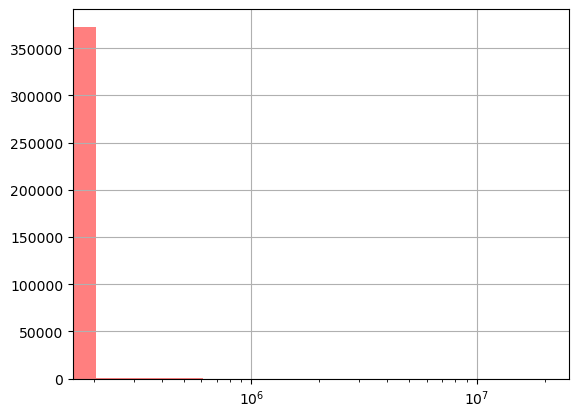

In [18]:
ax = df.Pledged.hist(bins=100, color="red", alpha=0.5)
plt.xscale("log")


In [22]:

pd.get_dummies(bicategoriacal, columns=['State'])

ID                                               Name  \
0       1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1        709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2       1703704063                                drawing for dollars   
3           727286                       Offline Wikipedia iPhone app   
4       1622952265                                         Pantshirts   
...            ...                                                ...   
374310   749399445                               Propeller Spring 2.0   
374400  1223058036   The Cowboy and The Spaceman: Android Collective+   
374458  1411606124                               The CHAMPS Are Here!   
374530   156799983                                     Kill Them All!   
374605   801423615                      Collaboration with Snoop Dogg   

            Category     Subcategory         Country            Launched  \
0            Fashion         Fashion   United States 2009-04-21 21:02:48   
1       Film & Video          Shorts   United States 2009-04-23 00:07:53   
2                Art    Illustration   United States 2009-04-24 21:52:03   
3         Technology        Software   United States 2009-04-25 17:36:21   
4            Fashion         Fashion   United States 2009-04-27 14:10:39   
...              ...             ...             ...                 ...   
374310         Games           Games         Austria 2017-12-23 10:14:21   
374400         Games  Tabletop Games  United Kingdom 2017-12-26 13:00:24   
374458       Fashion         Apparel   United States 2017-12-27 03:52:38   
374530         Games  Tabletop Games   United States 2017-12-28 01:48:58   
374605         Music         Hip-Hop       Australia 2017-12-29 03:22:32   

         Deadline   Goal  Pledged  Backers         Duration  State_Failed  \
0      2009-05-31   1000      625       30 39 days 02:57:12          True   
1      2009-07-20  80000       22        3 87 days 23:52:07          True   
2      2009-05-03     20       35        3  8 days 02:07:57         False   
3      2009-07-14     99      145       25 79 days 06:23:39         False   
4      2009-05-26   1900      387       10 28 days 09:49:21          True   
...           ...    ...      ...      ...              ...           ...   
374310 2017-12-26     36      270       36  2 days 13:45:39         False   
374400 2017-12-31    271      545       25  4 days 10:59:36         False   
374458 2017-12-31    200      202        6  3 days 20:07:22         False   
374530 2017-12-30    250      265        7  1 days 22:11:02         False   
374605 2018-01-01    392      514        6  2 days 20:37:28         False   

        State_Successful  
0                  False  
1                  False  
2                   True  
3                   True  
4                  False  
...                  ...  
374310              True  
374400              True  
374458              True  
374530              True  
374605              True  

[331462 rows x 13 columns]

<Axes: ylabel='Category'>

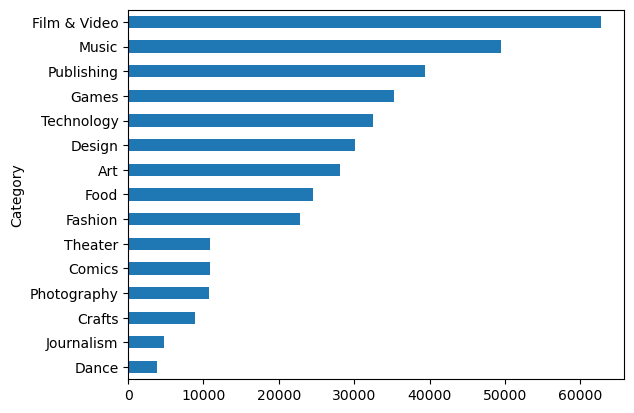

In [23]:
df["Category"].value_counts().sort_values().plot(kind="barh")

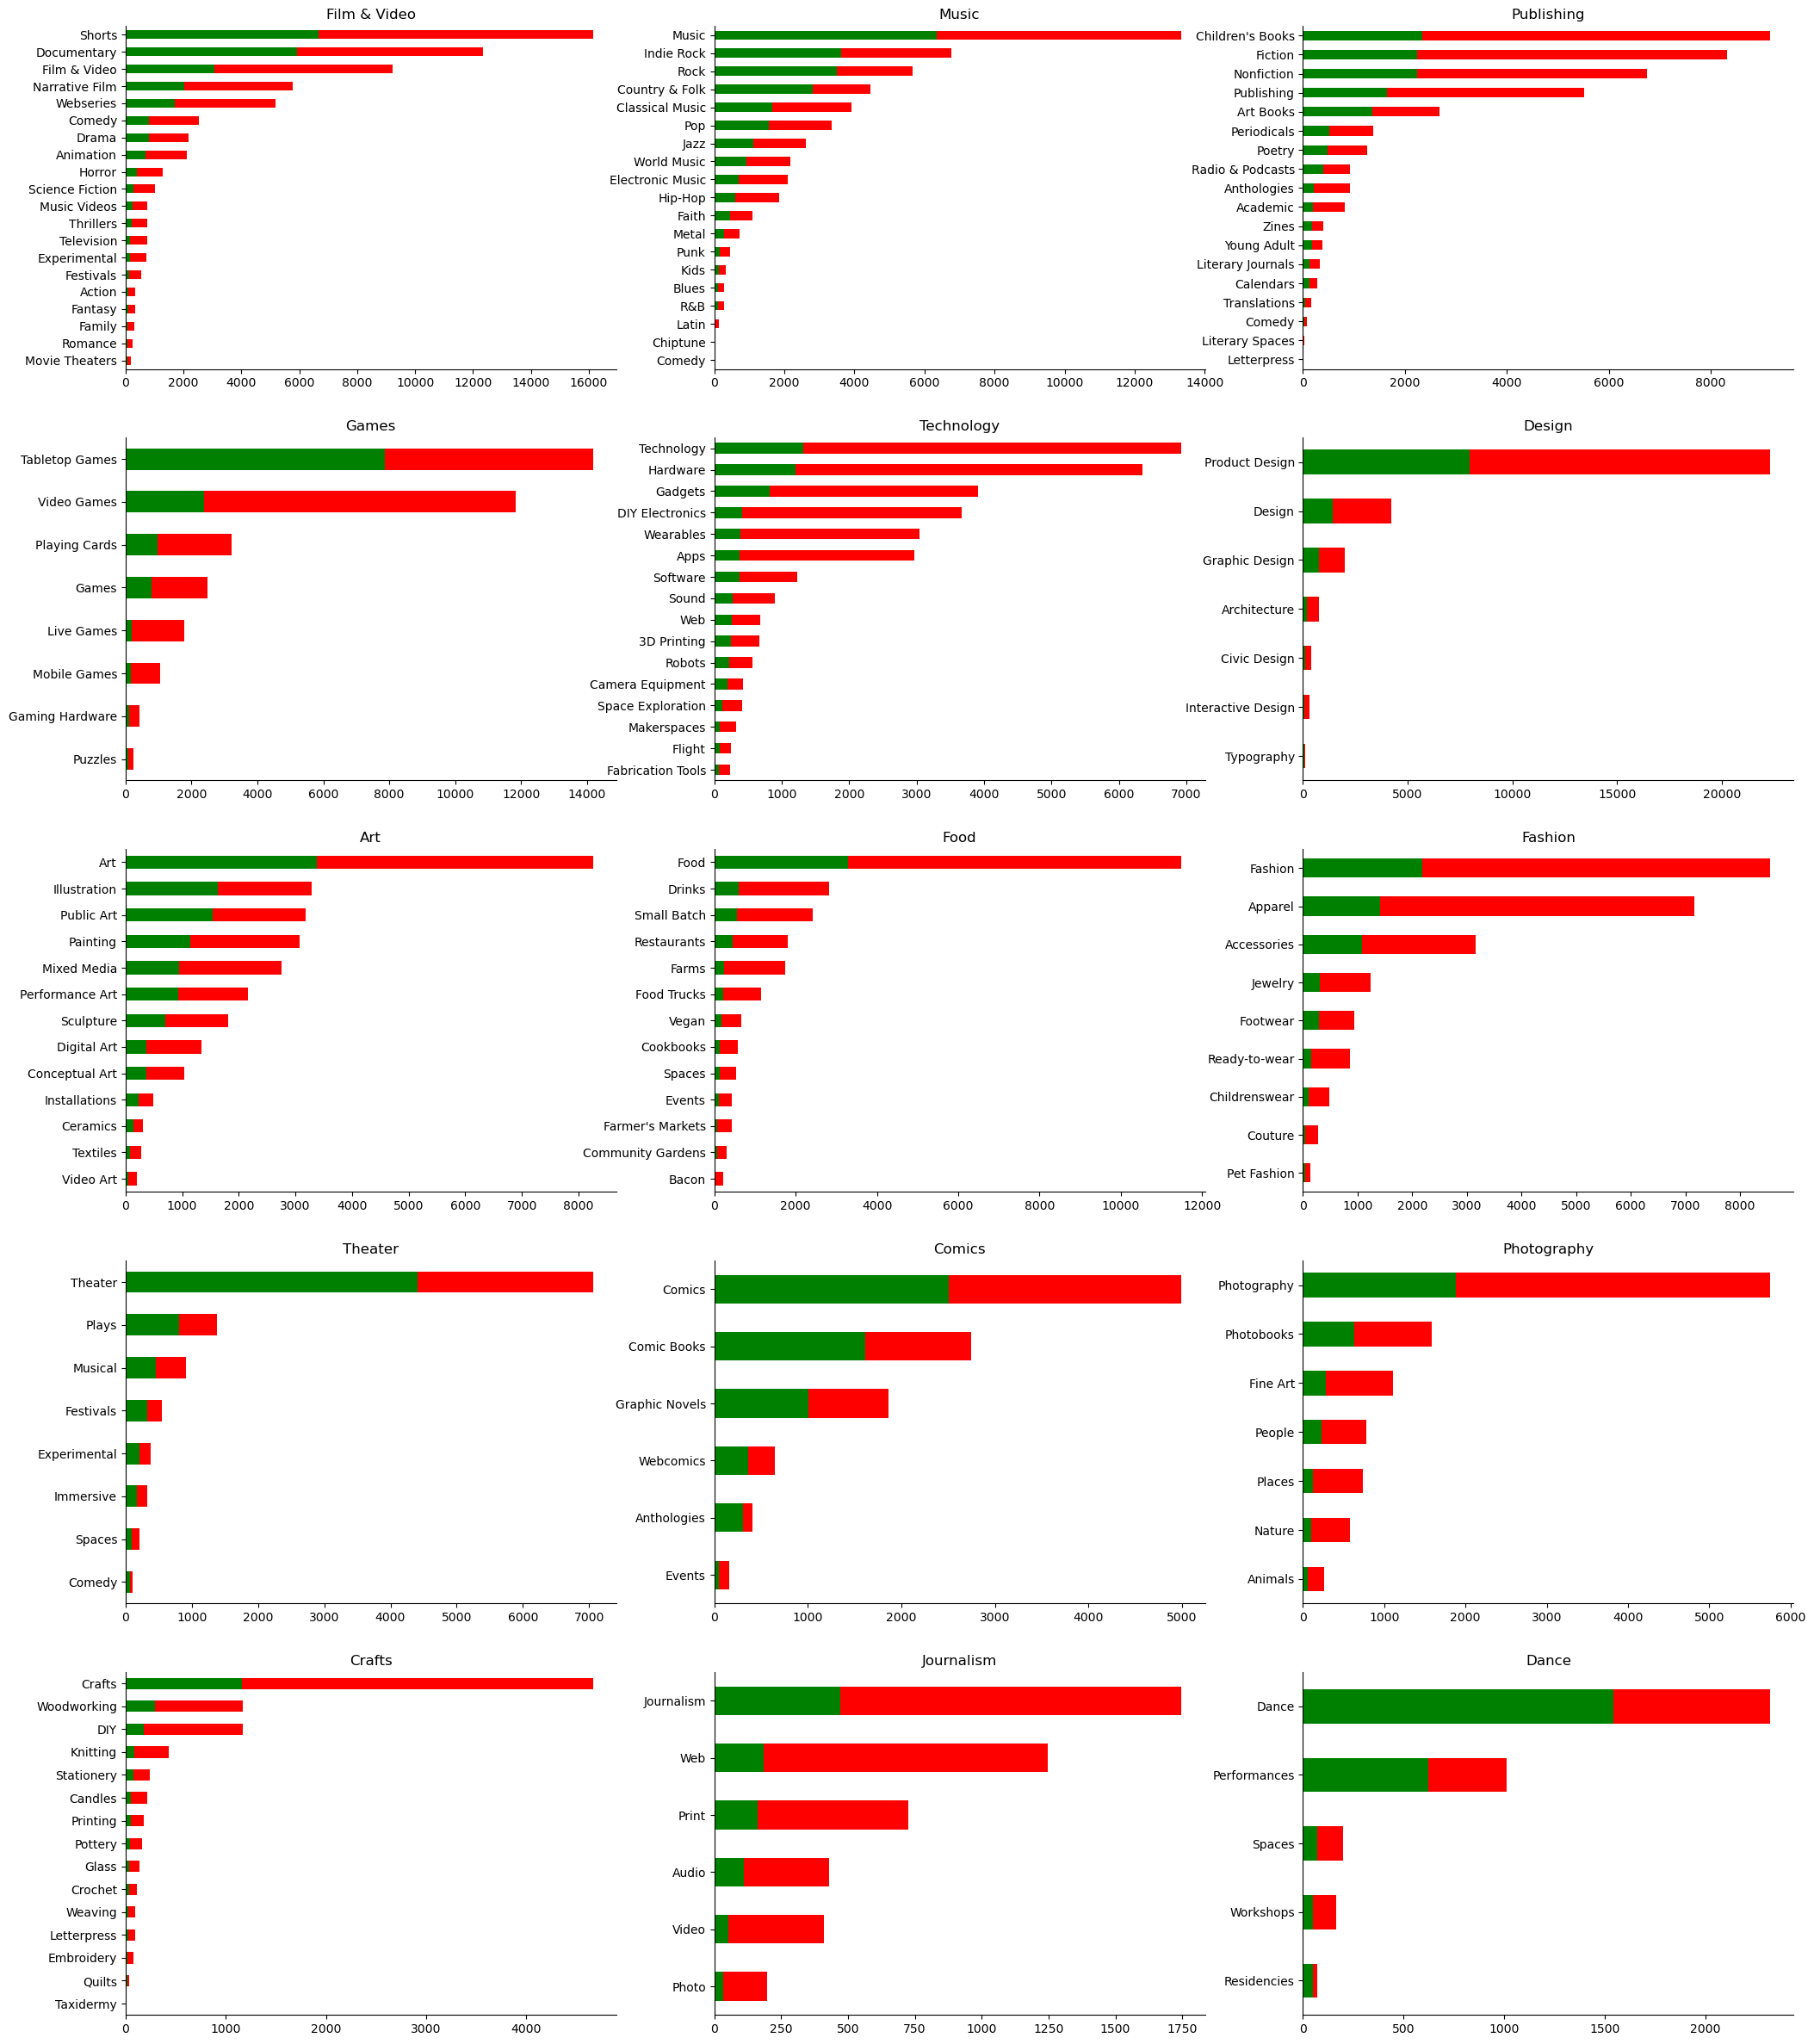

In [25]:
fig, axs = plt.subplots(5, 3, figsize= (25, 30))

for category, ax in zip(df["Category"].value_counts().sort_values(ascending=False).index, axs.flatten()):
    #sns.countplot(df[df["Category"] == category], y="Subcategory", hue="State", ax=ax)
    df[df["Category"] == category]["Subcategory"].value_counts().sort_values().plot(kind="barh", ax=ax, color="red")
    df[df["Category"] == category].query("State == 'Successful'")["Subcategory"].value_counts().sort_values().plot(kind="barh", ax=ax, color="green")
    ax.set_ylabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_title(category)

<Figure size 5000x1200 with 0 Axes>

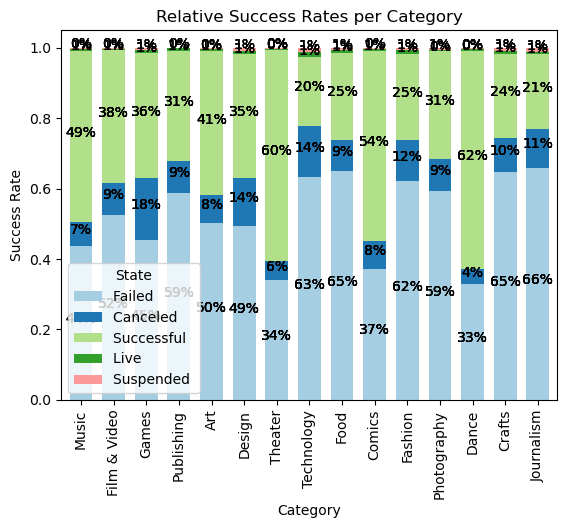

In [27]:
states = ['Failed', 'Canceled', 'Successful', 'Live', 'Suspended']

# Create a pivot table to calculate the relative success rate per category
pivot_table = df.pivot_table(index='Category', columns='State', aggfunc='size', fill_value=0)

# Calculate the total counts per category
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the relative success rate (Successful / Total) for each state
for state in states:
    pivot_table[f'{state} '] = pivot_table[state] / pivot_table['Total']

# Sort the categories by the success rate of 'Successful' state
sorted_categories = pivot_table['Successful'].sort_values(ascending=False).index
pivot_table = pivot_table.reindex(sorted_categories)

# Plot the relative success rates per category for all states
plt.figure(figsize=(50, 12))
colors = plt.cm.Paired(range(len(pivot_table)))
ax = pivot_table[[f'{state} ' for state in states]].plot(kind='bar', stacked=True, color=colors, width=0.7)
plt.title('Relative Success Rates per Category')
plt.xlabel('Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)

# Annotate the bars with percentage values
for state in states:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        success_rate = p.get_height()
        ax.annotate(f'{success_rate*100:.0f}%', (x + width / 2, y + height / 2), ha='center')

plt.show()


<Figure size 1200x800 with 0 Axes>

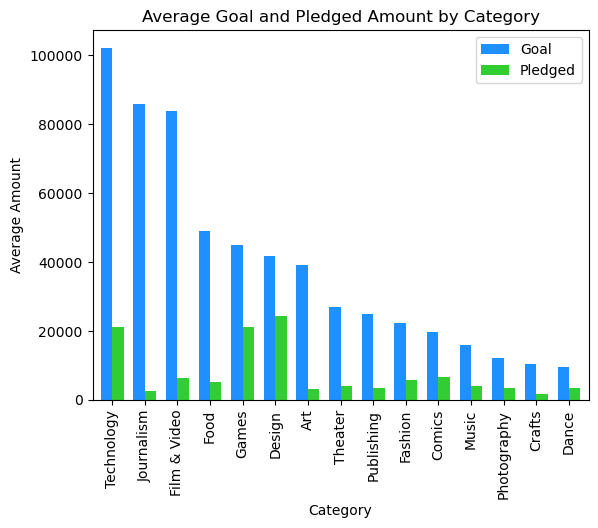

In [28]:
# Group by Category and calculate the mean of the 'Goal' and 'Pledged' columns
goal_pledged_by_category = df.groupby('Category')[['Goal', 'Pledged']].mean()

# Sort the values to display in a more meaningful order
goal_pledged_by_category = goal_pledged_by_category.sort_values(by='Goal', ascending=False)

# Plot the goal and pledged amounts by category
plt.figure(figsize=(12, 8))
ax = goal_pledged_by_category.plot(kind='bar', color=['dodgerblue', 'limegreen'], width=0.7, position=0.5)

plt.title('Average Goal and Pledged Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=90)
plt.legend(['Goal', 'Pledged'])
plt.show()

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


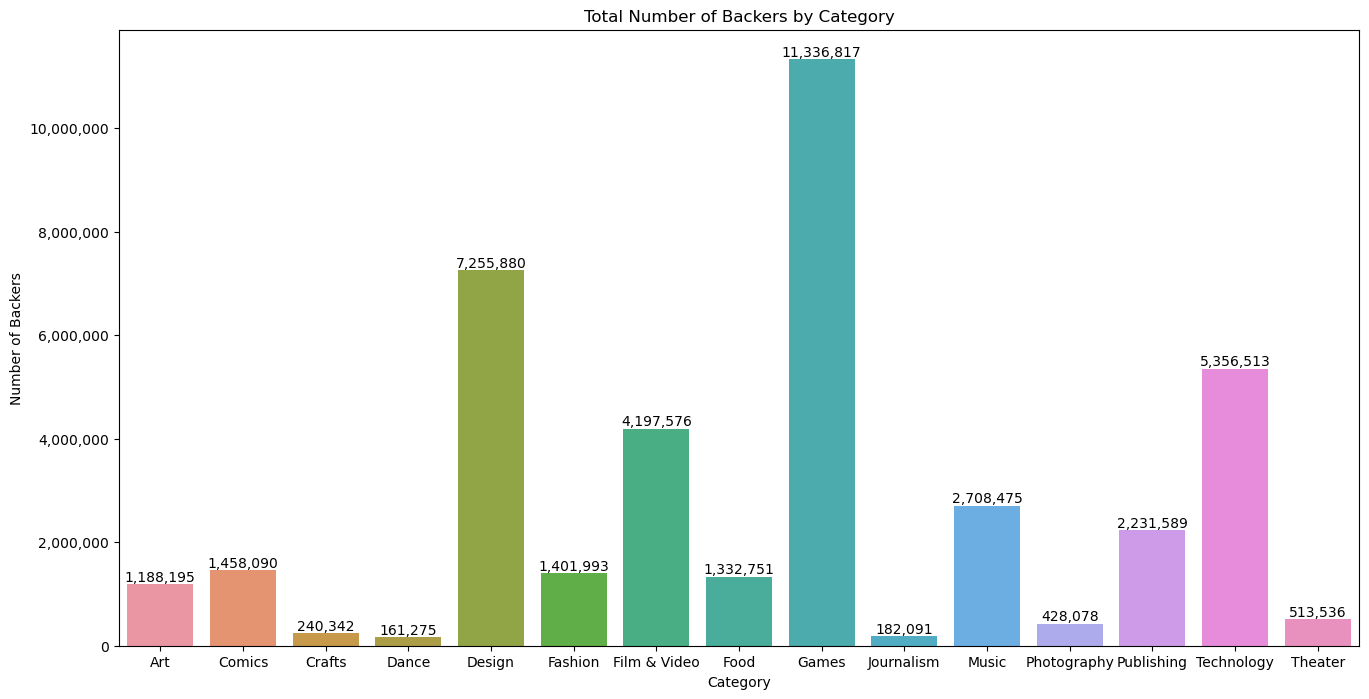

In [29]:
backers_by_category = df.groupby('Category')['Backers'].sum().reset_index()
fig = plt.figure(figsize=(16, 8))
backers_by_category = df.groupby('Category')['Backers'].sum().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='Category', y='Backers', data=backers_by_category)

# Set the title and axis labels
plt.title('Total Number of Backers by Category')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Format y-axis ticks to show the actual number of backers
def format_ticks(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Add total number of backers on top of each bar
for index, row in backers_by_category.iterrows():
    plt.annotate(f'{int(row["Backers"]):,}', xy=(index, row['Backers']), ha='center', va='bottom')

# Show the plot
plt.show()
plt.show()

In [30]:
df["Month"] = df.Launched.dt.month
df["Year"] = df.Launched.dt.year

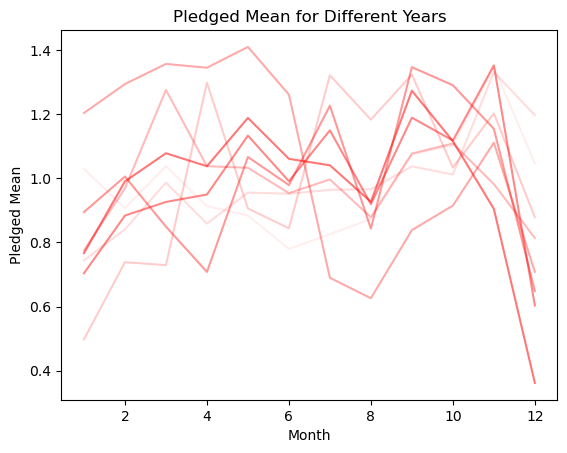

In [31]:
fig, ax = plt.subplots(1, 1)

for i, year in enumerate(df.Year.unique()):
    year_data = df[df["Year"] == year].groupby("Month").Pledged.mean() / df[df["Year"] == year].Pledged.mean()
    ax.plot(year_data.index, year_data, label=f'Year {year}', color="red", alpha = i/15)

plt.legend()
plt.xlabel("Month")
plt.ylabel("Pledged Mean")
plt.title("Pledged Mean for Different Years")
plt.legend('',frameon=False)
plt.show()

In [32]:
# Extract the year from Launched
df['Launch_Year'] = df['Launched'].dt.year


# Calculate success rate
# Define successful projects
df['Is_Successful'] = df['State'] == 'Successful'

# Group by Country and Launch_Year and calculate success rate
success_rate_by_country_year = df.groupby(['Country', 'Launch_Year'])['Is_Successful'].mean().reset_index()

In [34]:
# Group by Country and Launch_Year and calculate success rate
success_rate_year_and_month = df.groupby(['Launch_Year', 'Month'])['Is_Successful'].mean().reset_index()

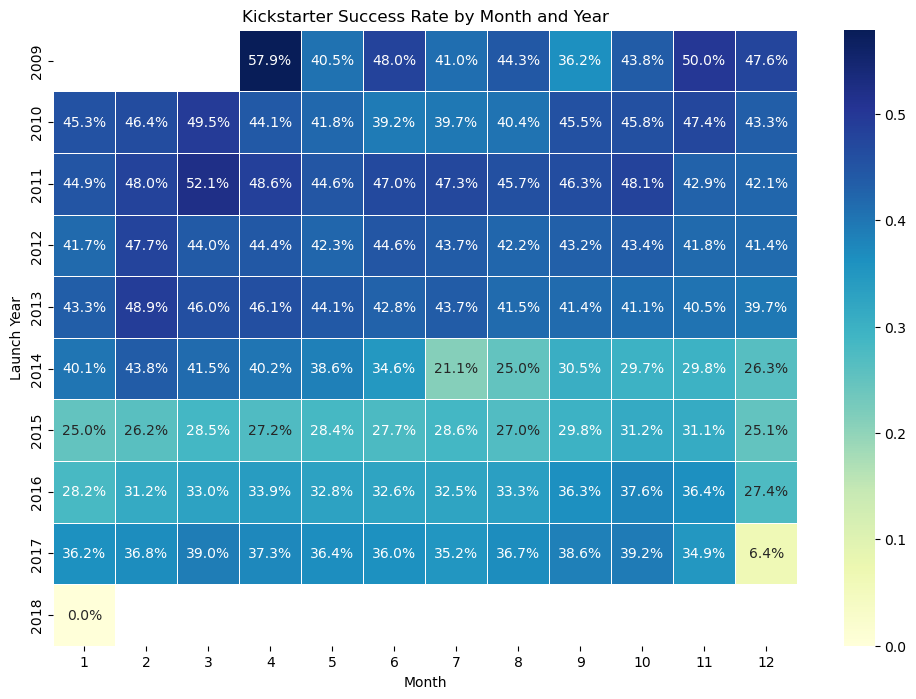

In [35]:
# Create a pivot table
#pivot_table = success_rate_year_and_month.pivot_table(index='Country', columns='Launch_Year', values='Is_Successful', aggfunc='mean')
pivot_table = success_rate_year_and_month.pivot_table(index='Launch_Year', columns='Month', values='Is_Successful', aggfunc='mean')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=.5)
plt.title('Kickstarter Success Rate by Month and Year')
plt.xlabel('Month')
plt.ylabel('Launch Year')
plt.show()

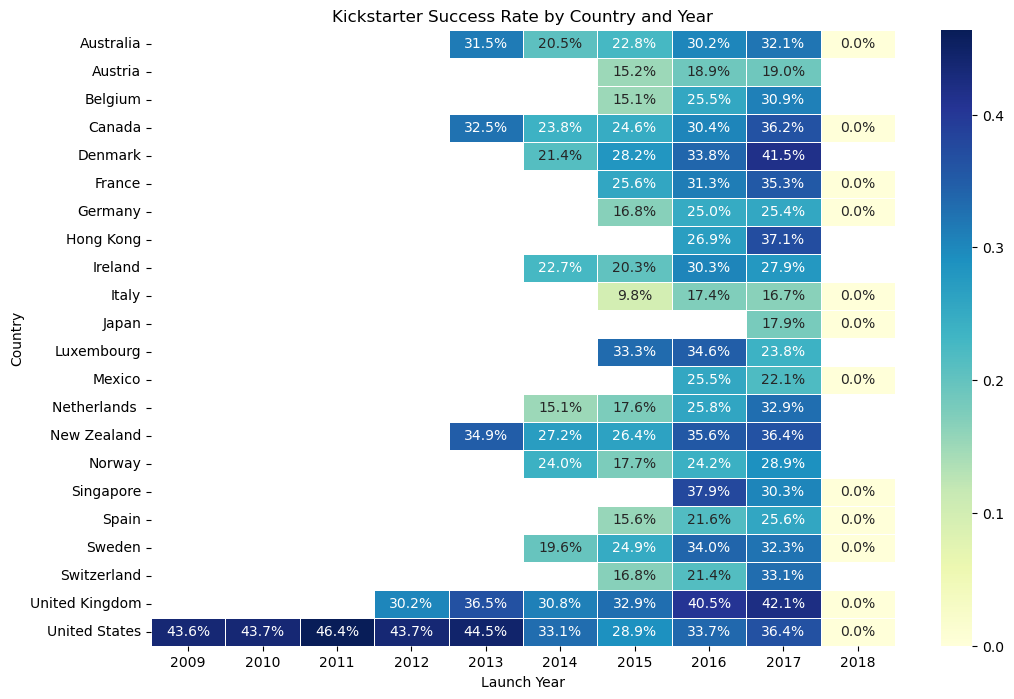

In [41]:
# Create a pivot table
pivot_table = success_rate_by_country_year.pivot_table(index='Country', columns='Launch_Year', values='Is_Successful', aggfunc='mean')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".1%", linewidths=.5)
plt.title('Kickstarter Success Rate by Country and Year')
plt.xlabel('Launch Year')
plt.ylabel('Country')
plt.show()

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

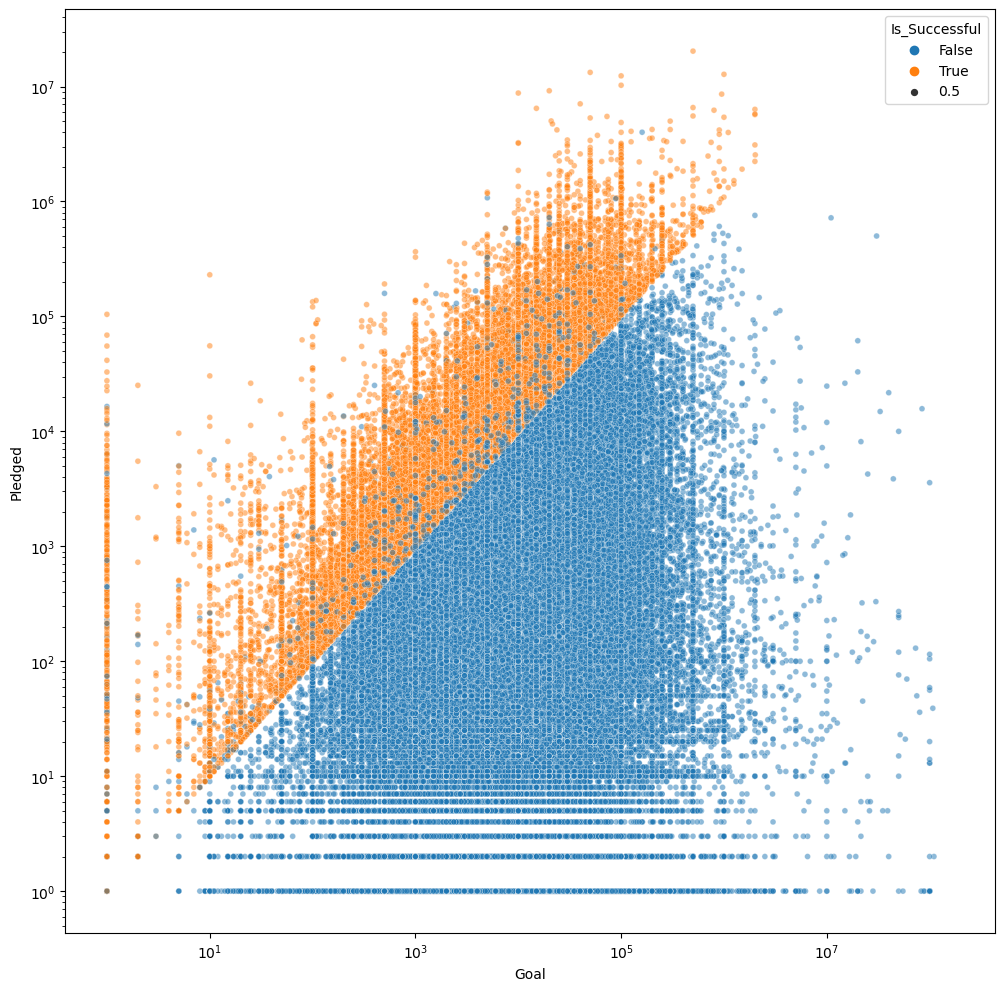

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.scatterplot(data=df, x="Goal", y="Pledged", hue="Is_Successful", ax=ax, size=0.5, alpha=0.5)
plt.xscale("log")
plt.yscale("log")

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


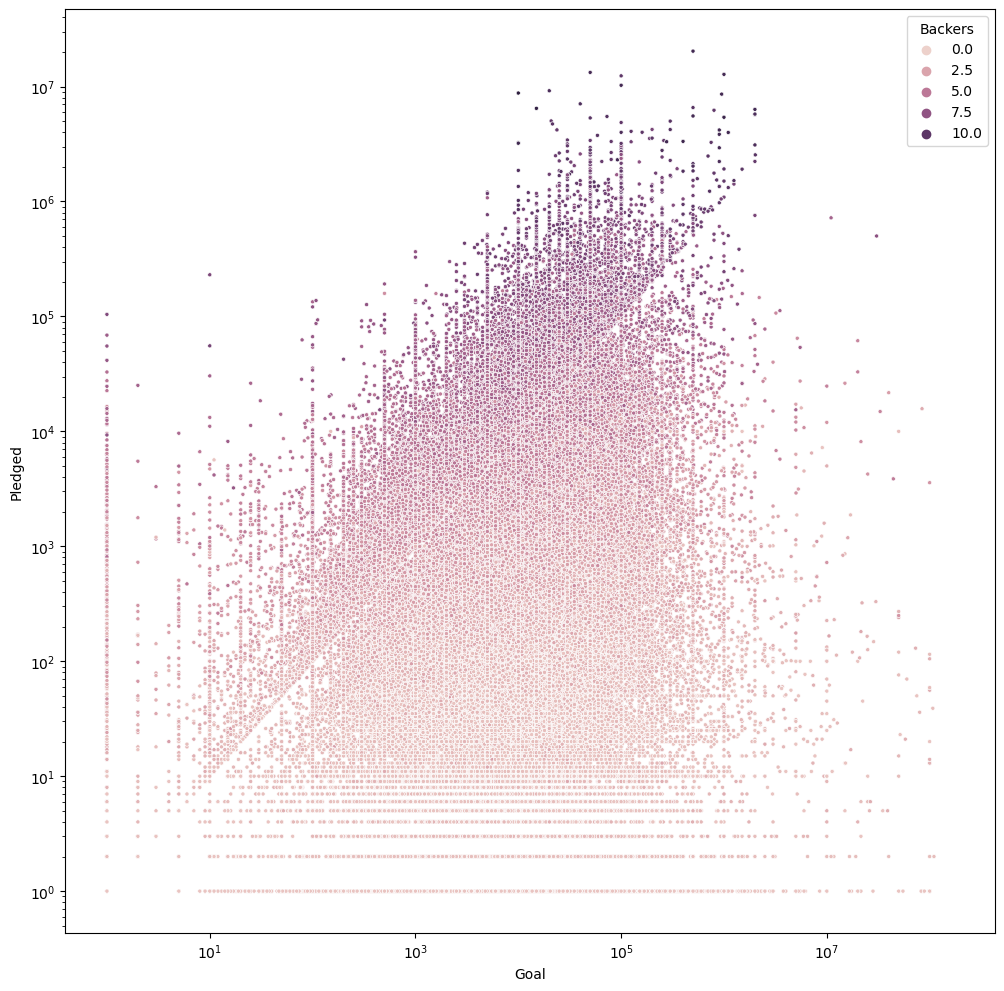

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.scatterplot(data=df, x="Goal", y="Pledged", hue=df["Backers"].apply(lambda x: np.log(x + 1)), ax=ax, alpha=1, marker=".")
plt.xscale("log")
plt.yscale("log")

/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nils/miniforge3/envs/ds-bootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

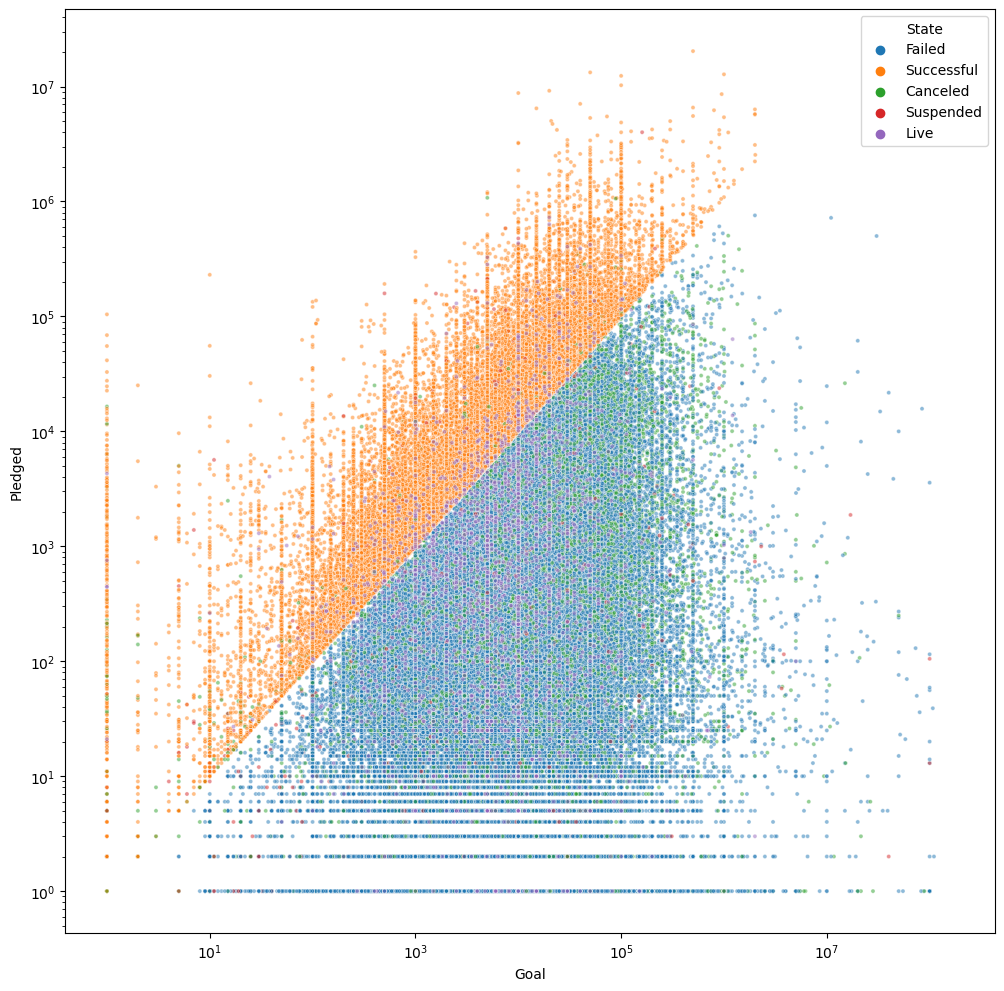

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

sns.scatterplot(data=df, x="Goal", y="Pledged", hue="State", ax=ax, alpha=0.5, marker=".")
plt.xscale("log")
plt.yscale("log")